## Regression and bias-variance trade-off problems
In this lab, we will focus at regression with `sklearn` module and the bias-variance trade-off.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
%matplotlib inline

In this example we will use the [diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) dataset. It has 9 numerical input features and a numerical response. Based on the blood glucose level from we will predict the progress of the sickness.

In [2]:
diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 9] # input features
y = diabetes.target # response
diabetes.data.shape

(442, 10)

First, we will fit the data by a linear regression model using the `LinearRegression` model from `sklearn.linear_model`.

When using prediction models in `sklearn`, we utilize two methods, `fit` and `predict`. As the names suggests,  the `fit` method is used to fit the model, e.g., to find parameters of the model. In this case, the `fit` will calculate the coefficients of the regression.

To see how well the model performed the predictions, we will visualize the *fitted* vs *real* values. In case of a perfect fit, the points would all lie at a line.

Linear model coefficients:  [619.22282068]


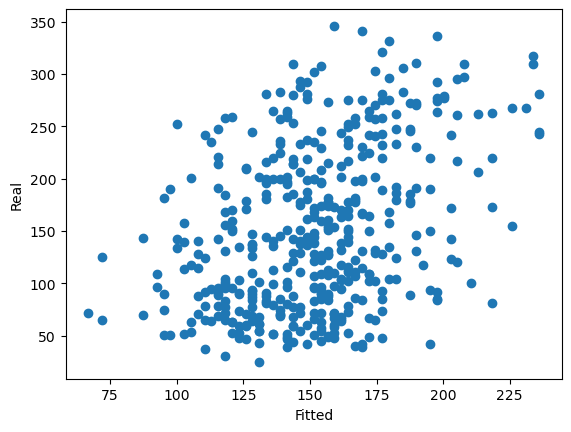

In [10]:
linear_regression_model = LinearRegression().fit(X, y)
fitted = linear_regression_model.predict(X)

# prints coefficients
print('Linear model coefficients: ', linear_regression_model.coef_)

plt.scatter(fitted, y)
plt.xlabel("Fitted")
_ = plt.ylabel("Real")

To avoid overfitting of the model, we will divide the data into *training* and *test* set. We will perform the split by the `train_test_split` method from `sklearn.model_selection`. This method takes as parameters the feature matrix and response vector. Additionally, we will use the `random_state` parameter to always get the same split of data.

Next, we do dummy predictions using two models:
1.   Dummy regressor estimating the response by the mean value of the input data. This is a kind of response, that is used as a benchmark for the model. If your model is worse than this, then the model has a really poor fit.
2.   Linear regression model.
In the cell below, you first need to fit the LinearRegression model to the training data and then to predict the test data.

In [11]:
from sklearn.dummy import DummyRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fits a DummyRegressor with mean of the training data
dummy_mean = DummyRegressor(strategy="mean").fit(X_train, y_train)
# predict y using thest data
y_test_dummy_mean = dummy_mean.predict(X_test)

# fit a linear regression model
lr_model = LinearRegression().fit(X_train, y_train)
# predict with linear regresion based on the test data
y_test_lr = lr_model.predict(X_test)

### KNN regression
Regression can be also performed by the KNN algorithm.

In KNN regression, we predict the value of the response for an observation based on the average of its K-nearest neigbors in the training data. The value of K is a user-defined hyperparameter. It determines the number of nearest neighbors used to make the prediction.

First, you need to fit the training data using `KNeighborsRegressor` method with $k=5$ (`n_neigbors` parameter) and then store the predictions for test data in `y_test_knn` variable

In [12]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn_regr = KNeighborsRegressor(k)# create an instance of KNeighborsRegressor with the given number of neighbours
# fit KNeighborsRegressor
knn_regr.fit(X_train, y_train)
y_test_knn = knn_regr.predict(X_test) # predict the test data

### Error measures for regression
As the first step, please finish the function calculating MSE, using dot product of the residuals.
The MSE using a sum is be defined as,

$MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

 Return the value as a scalar.



In [38]:
# MSE calculation
def MSE(y_real, y_fitted):
  # you can raise an exception if the vectors have a different length

  # residual
  resid = y_real - y_fitted
  # compute MSE with dot product
  MSE = np.dot(resid.T, resid)/resid.shape[0]
  return MSE.item() # the item extracts first item of np array as a scalar, as the dot product shall return an array in this case

This a check of the above `MSE` implementation with sklearn's `mean_squarred_error`. Both should return the same value.

In [39]:
y_real = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
y_est = np.array([1,2,4,6,6,6,4,8]).reshape(-1,1)

print(f"Sklearn MSE: {mean_squared_error(y_real, y_est)}")
print(f"Custom MSE: {MSE(y_real, y_est)}")

Sklearn MSE: 1.875
Custom MSE: 1.875


Next, we compare training and test MSE for the three methods trained above. Which model has fit the data best?

1. estimate training error for KNN
2. compute MSE for KNN

In [40]:
y_train_lr = lr_model.predict(X_train)
y_train_dummy = dummy_mean.predict(X_train)
y_train_knn = knn_regr.predict(X_train)

mse_dummy_train = MSE(y_train, y_train_dummy)
print(f"Dummy MSE: {mse_dummy_train:.2f}")

mse_lr_train = MSE(y_train, y_train_lr)
print(f"Linear model MSE: {mse_lr_train:.2f}")

# add code computing and printing MSE for KNN
mse_knn_train =  MSE(y_train, y_train_knn)
print(f"KNN MSE: {mse_knn_train:.2f}")

Dummy MSE: 6253.47
Linear model MSE: 5335.95
KNN MSE: 4917.71


We can look at the test data and inspect which model gave the best fit. The linear model is only 14% better compared to the Dummy regressor (mean) in terms of MSE. This tells us that most likely there is a weak relationship among $y$ and $x$.

Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4248.26
Mean squared error (knn): 4717.65


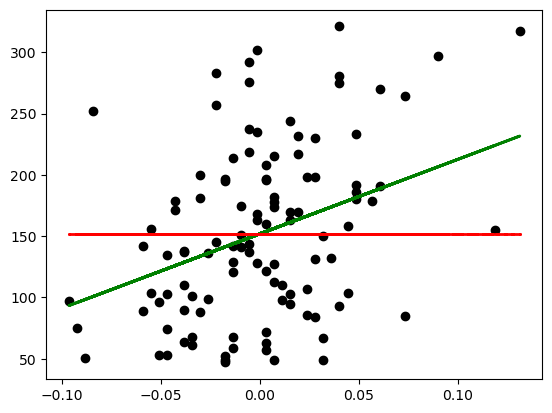

In [41]:
print(f"Mean squared error (dummy): {mean_squared_error(y_test, y_test_dummy_mean):.2f}")
print(f"Mean squared error (linear model): {mean_squared_error(y_test, y_test_lr):.2f}")
print(f"Mean squared error (knn): {mean_squared_error(y_test, y_test_knn):.2f}")

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_test_lr, color='green', linewidth=2)
plt.plot(X_test, y_test_dummy_mean, color='red', linestyle = 'dashed',
         linewidth=2, label = 'dummy')

plt.show()

# Bias-variance tradeoff

In this example, we will look at one of the most simple examples of overfitting. First, we generate polynomial data using $sin(x)$ function and adding some Gaussian noise.

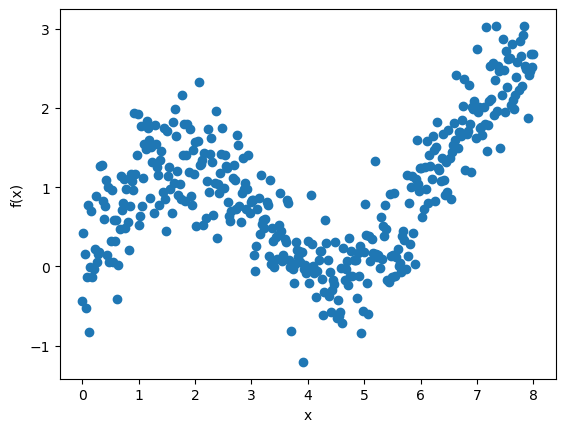

In [42]:
np.random.seed(123)
n = 400
# creates a uniform sequence of n values between 0 and 8 (inclusive)
x = np.linspace(0, 8, n)
y = np.sin(x) + np.random.normal(0,0.4, n) + 0.2*x
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

To fit the points, we will use polynomials of various degrees. The larger the degree of the polynomial, the more flexible the polynomial curve becomes.
Fit a polynomial with 30th and 100th degree, similar to the fit with 5th degree below.

In [43]:
p5 = np.poly1d(np.polyfit(x, y, deg=5))

# in a similar fashion fit a polynomial with 30th and 100th degree
p30 = np.poly1d(np.polyfit(x, y, deg=30))
p100 = np.poly1d(np.polyfit(x, y, deg=100))

c:\Users\Patrik\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Patrik\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In the visualization below, we see that all the polynomials can fit the data quite well.

After zooming-in the right part of the plot (second image), we can see the polynomial of the higher degree (red dashed line) tends to overfit.

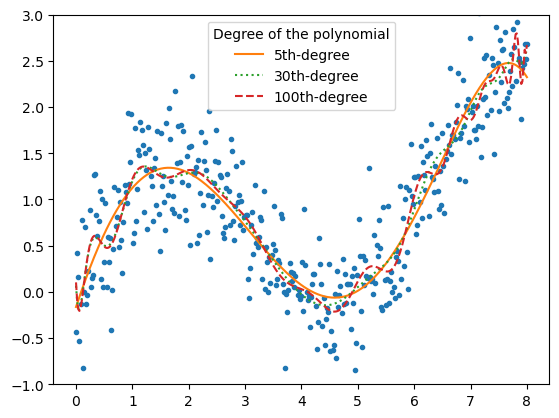

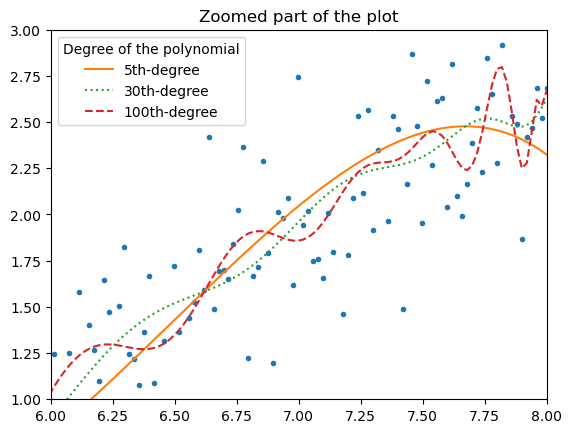

In [44]:
_ = plt.plot(x, y, '.')
plt.plot(x, p5(x), '-', label = '5th-degree')
plt.plot(x, p30(x), ':', label = '30th-degree')
plt.plot( x, p100(x),'--', label = '100th-degree')
plt.legend(title="Degree of the polynomial")
plt.ylim(-1,3)
plt.show()

_ = plt.plot(x, y, '.')
plt.title("Zoomed part of the plot")
plt.plot(x, p5(x), '-', label = '5th-degree')
plt.plot(x, p30(x), ':', label = '30th-degree')
plt.plot( x, p100(x),'--', label = '100th-degree')
plt.legend(title="Degree of the polynomial")
plt.ylim(1,3) # y limits to be zoomed
plt.xlim(6,8) # x limits to be zoomed
plt.show()

On the zoomed plot, notice the large flexibility of the 100th degree polynomial, how it tends to overfit the data.

## Training and test set data splitting
What degree of polynomial to choose for this fit? Above we observed a fit of polynomials with three different degrees. To find the right degree, we can select a few degrees of polynomials and fit them on the train data. Then, evaluate which fits the data best on the test data.

In the cell below, divide the data into training and test set, with `test_size=0.25` and `random_state=0`.

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(300,) (300,)
(100,) (100,)


Add the tests MSE calculation, and the plot for test MSE. Inspect the plot and decide when does the model overfit.

In [47]:
import warnings
# to ignore the warnings about high rank of polynomials
warnings.simplefilter('ignore', np.RankWarning)

# polynomial degrees
poly_degrees = [5, 7, 9, 11, 20, 30, 40, 50, 60, 80, 100]

poly_list = [np.poly1d(np.polyfit(x_train, y_train, i)) for i in poly_degrees]


train_MSE = [round(MSE(p(x_train), y_train), 3) for p in poly_list]
# calculate MSE on the test set using list comprehensions
test_MSE = [round(MSE(p(x_test), y_test), 3) for p in poly_list]

for i,j,k in zip(poly_degrees, train_MSE, test_MSE):
  print(f"p:{i:4d}, train MSE: {j:.3f}, test MSE: {k:.3f}")

p:   5, train MSE: 0.164, test MSE: 0.151
p:   7, train MSE: 0.161, test MSE: 0.144
p:   9, train MSE: 0.161, test MSE: 0.145
p:  11, train MSE: 0.161, test MSE: 0.146
p:  20, train MSE: 0.155, test MSE: 0.148
p:  30, train MSE: 0.154, test MSE: 0.150
p:  40, train MSE: 0.147, test MSE: 0.171
p:  50, train MSE: 0.146, test MSE: 0.162
p:  60, train MSE: 0.145, test MSE: 0.177
p:  80, train MSE: 0.144, test MSE: 0.249
p: 100, train MSE: 0.144, test MSE: 0.348


Now, plot the values displayed above and do not forget to add the label.

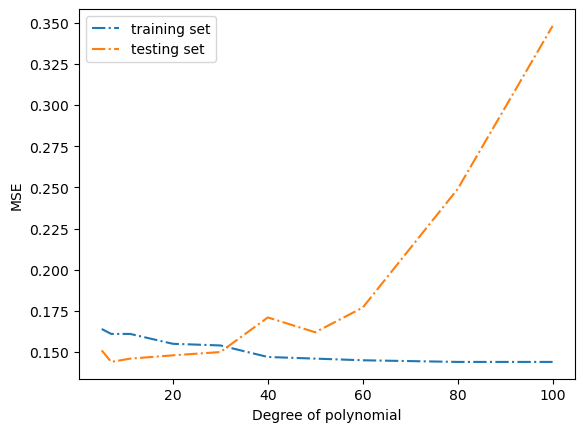

In [49]:
plt.plot(poly_degrees, train_MSE, "-.", label = 'training set')
# add the test mse to the plot using plt.plot()
plt.plot(poly_degrees, test_MSE, "-.", label = 'testing set')
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
_ = plt.legend()

As we can see, the lines cross around the 30th degree, and the test error becomes larger than the training error.

In the cell below print the for which degrees the polynomials tend to overfit and for which to underfit.

In [50]:
print("overfit over 30, underfit less than 5?")

overfit over 30, underfit less than 5?


### Fitting a KNN model
Now, try yourself to fit the data with KNN for varying number of nearest neighbours. For example you can try $k \in \{2, 3, 5, 7, 9, 11 , 20, 30\}$ nearest neighbours to see how the parameter changes the fit.

 For which value of *k* is the model more likely to overfit? For which value of *k* is the model more likely to underfit?

 1. Create the list of $k$'s
 2. Get estimates on test data
 3. append test MSE to the `mse_test_list`
 4. plot the line with test MSE

Train MSE: [0.11 0.12 0.14 0.15 0.16 0.17 0.18 0.21 0.3 ]
Test MSE: [0.22 0.18 0.16 0.16 0.15 0.15 0.18 0.22 0.3 ]


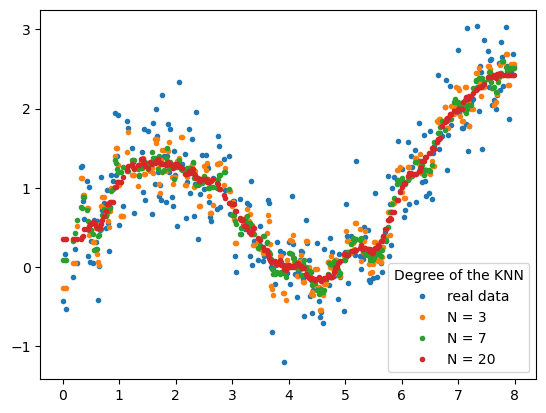

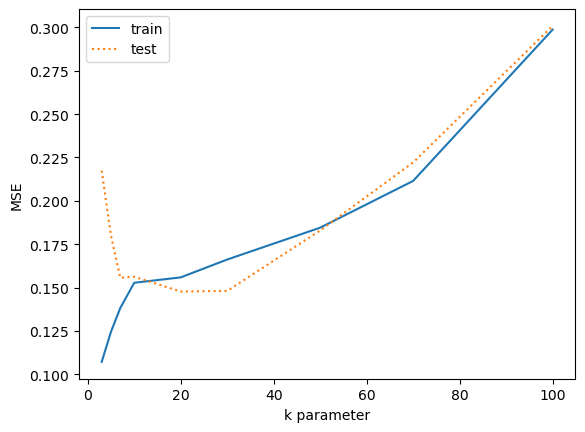

In [55]:
from sklearn import neighbors

# create the list of K's
KNN_k = [3, 5, 7, 10, 20, 30, 50, 70, 100]

KNN_list = []
y_fit_list = []
mse_train_list = []
mse_test_list = []

for i in KNN_k:
  knn_model = neighbors.KNeighborsRegressor(n_neighbors = i)
  knn_model.fit(x_train.reshape(-1, 1), y_train)
  est_train_y = knn_model.predict(x_train.reshape(-1, 1))
  # predict y with KNN and the test data - do not forget to reshape the data
  est_test_y = knn_model.predict(x_test.reshape(-1, 1))
  y_fit_list.append(est_train_y)
  mse_train_list = np.append(mse_train_list, MSE(y_train, est_train_y))
  # append the test MSE to the test MSE vector similar to the above
  mse_test_list = np.append(mse_test_list, MSE(y_test, est_test_y))


print(f"Train MSE: {mse_train_list.round(2)}")
print(f"Test MSE: {mse_test_list.round(2)}")

plt.plot(x_train, y_train, '.', label = 'real data')
for i in [0, 2, 4]:
  plt.plot(x_train, y_fit_list[i], '.', label = f'N = {KNN_k[i]}')

plt.legend(title="Degree of the KNN")
plt.show()

plt.plot(KNN_k , mse_train_list, '-', label = 'train')
# display the knn wit test MSE list, ':' as the line
plt.plot(KNN_k , mse_test_list, ':', label = 'test')
plt.xlabel("k parameter")
plt.ylabel("MSE")
_ = plt.legend()
plt.show()

In the cell below write how does $k$ influence under- and overfitting, i.e. how does the flexibility of the method charnges with $k$.

In [56]:
print("gets good between 15 to 30, then worse after 50 quickly.")

gets good between 15 to 30, then worse after 50 quickly.


### Polynomial fitting using sklearn polynomial feature generation


To do the polynomial approach in a `sklearn` way, we can use the `PolynomialFeatures` from `sklearn.preprocessing`. This class implements the `fit`, `fit_transform`, and `transform` methods as the classes from `preprocessin` we worked before.



In [57]:
from sklearn.preprocessing import PolynomialFeatures

We pass to `fit_transform` the number of polynomial features we would like to receive. If the `include_bias` parameter is set to `true` (by default it is), the methods adds vector of ones (intercept) as the first coulmn.
Try to follow these steps as we did above for `KNN`:
1. Split the data into training and test data
2. Do the predictions for train and test data  
3. Plot the train vs test MSE
4. Plot the fitted lines vs data for values `poly_degrees` $\in \{4, 9, 25\}$ in different colors.
5. Print the polynomial degree that fitted the best.


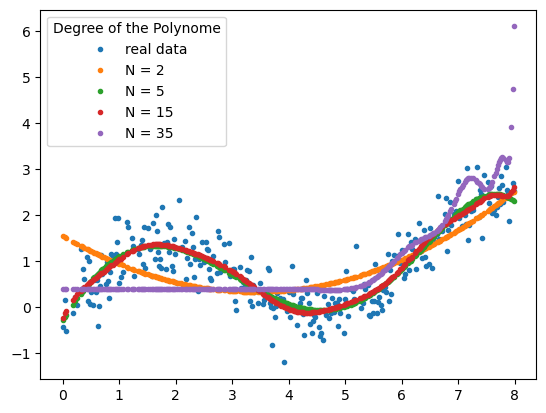

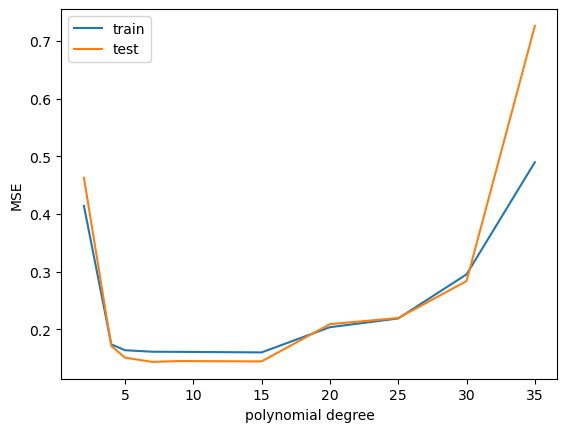

In [66]:
poly_degrees = [2,4,5,7,9,15,20,25,30,35]
poly = PolynomialFeatures(100)
X_p = poly.fit_transform(x.reshape(-1,1))

# divide the X_p and y into trainign and test set, with test_size=0.25 and random_state=0
X_p_train, X_p_test, y_train, y_test = train_test_split(X_p, y, test_size=0.25, random_state=0)

y_lr_fit_list = []

y_est_list = []
train_mse_list = []
test_mse_list = []
for i in poly_degrees:
  reg_model = LinearRegression().fit(X_p_train[:,0:(i+1)], y_train)
  y_lr_fit_list.append(reg_model.predict(X_p_train[:,0:(i+1)]))
  train_mse_list.append(MSE(y_train, reg_model.predict(X_p_train[:, 0:(i+1)])))
  # append test error
  test_mse_list.append(MSE(y_test, reg_model.predict(X_p_test[:, 0:(i+1)])))


plt.plot(x_train, y_train, '.', label = 'real data')
# add the indices of required degrees below
for i in [0, 2, 5, 9]:
  plt.plot(x_train, y_lr_fit_list[i], '.', label = f'N = {poly_degrees[i]}')

plt.legend(title="Degree of the Polynome")
plt.show()




plt.plot(poly_degrees , train_mse_list, '-', label = 'train')
# display the regression wit test MSE list, ':' as the line
plt.plot(poly_degrees , test_mse_list, '-', label = 'test')
plt.xlabel("polynomial degree")
plt.ylabel("MSE")
_ = plt.legend()


## Object oriented way of fitting the models - nonmandatory part
Try to implement the fitting and MSE evaluation for LinearRegression and KNN in an object oriented way.